# Lab-1: Data Manipulation and Exploration.
_____
##### In this lab, you will manipulate a dataset and prepare it for training and testing.

### Objectives:
1. Data exploration
2. One-hot-encoding of categorical features
3. Data imputation
4. Features Scaling
5. Trainset splitting
6. Data plotting
-----
### Loading Data

In [69]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/train.csv')
x_test_private = pd.read_csv('./data/test.csv')
x_train = data.loc[:, :'Gender Inequality Index (GII)']
y_train = data['y']

In [51]:
data.head(5)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN,0.154247


### Data exploration

In [3]:
x_train.head(5)

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,...,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,...,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.611753,NaN,NaN


In [4]:
types = x_train.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 1
galactic year                                                                  int64
galaxy                                                                        object
existence expectancy index                                                   float64
existence expectancy at birth                                                float64
Gross income per capita                                                      float64
                                                                              ...   
Intergalactic Development Index (IDI), male, Rank                            float64
Adjusted net savings                                                         float64
Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total    float64
Private galaxy capital flows (% of GGP)                                      float64
Gender Inequality Index (GII)                                                float64
Length: 79, dtype: object


In [10]:
x_train.describe()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,867.000000,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,8.837096,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733
std,6.945463e+03,0.162367,10.461654,18736.378445,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,2.806800,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785
min,9.900250e+05,0.227890,34.244062,-126.906522,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,2.313778,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186886,0.089092
25%,9.950060e+05,0.763027,69.961449,20169.118912,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,6.843091,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332
50%,1.000000e+06,0.907359,78.995101,26600.768195,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,8.518629,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640
75%,1.006009e+06,0.992760,84.558971,36898.631754,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,10.573365,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404
max,1.015056e+06,1.246908,100.210053,151072.683156,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,23.531546,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439


### One-hot-encoding of categorical feature
1. Why to encode the categorical feature?
2. Why one-hot-encoding form? why not give each category in the feature a specific code value?
3. How many new features will be added? What if we have some missing values, which is the case in this dataset?
4. When is it appropriate to give each category an encoding value?

##### In the next cell, implement the function that take a dataframe, name of the categorical feature, and the encoder object. Then, adds new features that represent the one-hot-encoding form of this feature and ignore the missing values in it (encode them to zeros).
##### Then encode the same column/feature in the testset with the same encoder object.

In [70]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
feature = ["galaxy"]
encoder.fit(x_train[feature])

def ohe_new_features(df, feature_name, encoder):
    # Write your code here (4:6 lines) ###
    # create new features from the encoder transform function
    encoded_ft = encoder.transform(df[feature_name])    #np
    encoded_ft = pd.DataFrame(encoded_ft)   #pd
    # concat it to the original dataframe
    result_df = pd.concat([df, encoded_ft], axis=1)
    # delete the categorical feature.
    result_df = result_df.drop(feature_name, axis=1)
    return result_df
    
# Write your code here (2 lines)
# Transform both train and testset using ohe
x_train = ohe_new_features(x_train,feature, encoder)
x_test_private = ohe_new_features(x_test_private,feature, encoder)

### Data Imputation
#### Imputation is filling the missing values in the dataset.
Several issues to address:
1. Why we should fill them? Why not remove the rows that has missing values?
2. Filling it with constant value for each value, but what's it?
3. (Advanced) Estimate the filling value, each row for its own.
4. How to choose the imputation strategy?
4. (Not related only to imputations) Why we fit the imputer to the training data not the concatenation of both train and test set?

##### In the next cell, implement a function that returns the count of nan/empty cells in a dataframe.
##### Use SimpleImputer object, fit it to the trainset, then transform both the train and test sets.

In [71]:
from sklearn.impute import SimpleImputer

# Complete a function that returns number of empty cells in
def count_nans(df):
    # 1 or 2 lines.
    return pd.isna(df).sum().sum()
    # return np.sum(pd.isna(df))

# Print number of empty cells both in x_train and x_test_private (1 line)
print("Number of nans in x_train: {:}, Number of nans in x_test_private: {:}".format(count_nans(x_train), count_nans(x_test_private)))
# Write your code here (4 lines):
# create the imputer object.
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# fit it to the trainset.
imp_mean.fit(x_train)
# transform the train and test set.
x_train_imputed = imp_mean.transform(x_train)
x_test_private_imputed = imp_mean.transform(x_test_private)


# Print number of empty cells both in x_train and x_test_private (1 line)
print("Number of nans in x_train: {:}, Number of nans in x_test_private: {:}".format(count_nans(x_train_imputed), count_nans(x_test_private_imputed)))



Number of nans in x_train: 185698, Number of nans in x_test_private: 19834
Number of nans in x_train: 0, Number of nans in x_test_private: 0


### Features Scaling
1. Why we need to make all the features have same range of values?
2. What are the different strategies to scale the features?
3. How to choose the strategy?

##### In the following cell, scale all the features with a scaler from your choice. Fit the scaler on the training set and transform both train and test set.

In [72]:
# Write your code here (5 lines):
# choose the scaler class.
# create the scaler object.
# fit it to the trainset.
# transform the train and test set.

from sklearn.preprocessing import RobustScaler
robust_scalar = RobustScaler()
robust_scalar.fit(x_train_imputed)
x_train_imputed = robust_scalar.transform(x_train_imputed)
x_test_private_imputed = robust_scalar.transform(x_test_private_imputed)


### Trainset splitting
Issues that lead to trainset splitting:
1. How we will measure the performance of our model?
2. How we will tune the hyperparamters? Can it be done with testset?

Issues to think of:
1. Is is the best strategy to get the best estimate for the true risk/performance of the system?
2. How to choose between two models?


##### In the next task, you will split your data into 3 parts, train, test, and validation by ratios: 70%, 20%, and 10% respectively.

In [73]:
from sklearn.model_selection import train_test_split
# Write your code here (2 lines)
x_train, x_test, y_train, y_test = train_test_split(x_train_imputed, y_train, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8) # train was 80% of the whole dataset, then we take 1/8 from that 80% -> will give us 10% of the whole dataset


In [74]:
print(x_train.shape, x_test.shape, x_val.shape)

(2705, 259) (773, 259) (387, 259)


### Data Plotting
Visualization is key-issue to get some insights and intuition about your dataset.
How to plot 79 features (79-dimensional data)? what we can plot -at maximum- is 2d or 3d data.

Hint: We should reduce the dimension. Read this [article](https://towardsdatascience.com/dimensionality-reduction-ways-and-intuitions-1b5e97592d8e).

So, Let's use MDS to reduce the dimension of this dataset to be 2D. (refer to the above article on how to use and the intuition behind it).

In [86]:
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn.manifold import MDS, TSNE
import umap.umap_ as umap

dim_reducer = umap.UMAP(n_components=2)
x_train_reduced = dim_reducer.fit_transform(x_train)


Let's plot the reduced dataset on a 2D plane.
Use matplotlib to make a scatter plot for the reduced dataset.

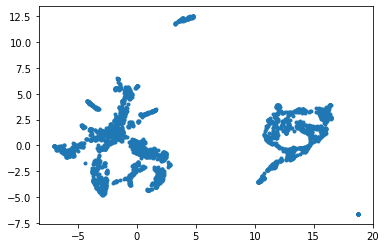

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

# Write code to plot the reduced dataset in a scatter plot.
plt.scatter(x_train_reduced[:,0], x_train_reduced[:,1], marker='.')
plt.show()